# Load Dictionaries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

DIC_PATH = 'data/dictionaries/raw'
VAR_DATA = 'data/variables/raw'
DATA_DIR = 'data/raw'



In [2]:
df_gaz_distemist = pd.read_csv(os.path.join(DIC_PATH, 'dictionary_distemist.tsv'), sep='\t', dtype={'code': str})
df_gaz_distemist['source'] = 'distemist'
df_gaz_distemist

,code,language,term,semantic_tag,mainterm,source
0,9989000,es,anomalía congénita de dedo del pie,disorder,1.0,distemist
1,9989000,es,malformación congénita de dedo del pie,disorder,0.0,distemist
2,9984005,es,exfoliación de dientes por enfermedad sistémica,disorder,1.0,distemist
3,9982009,es,intoxicación causada por cocaína,disorder,1.0,distemist
4,998008,es,enfermedad de Chagas con compromiso del corazón,disorder,1.0,distemist
...,...,...,...,...,...,...
3742,93606008,es,osificación incompleta del astrágalo,disorder,1.0,distemist
3743,93606008,es,osificación reducida del astrágalo,disorder,0.0,distemist
3744,93605007,es,osificación incompleta del hueso supraoccipital,disorder,1.0,distemist
3745,93605007,es,osificación reducida del hueso supraoccipital,disorder,0.0,distemist


In [6]:
df_gaz_medprocner = pd.read_csv(os.path.join(DIC_PATH, 'gazzeteer_medprocner_v1_noambiguity.tsv'), sep='\t', dtype={'code': str})
df_gaz_medprocner['source'] = 'medprocner'
df_gaz_medprocner

,code,term,semantic_tag,mainterm,language,source
0,386219007,útero en el posparto: disminución del sangrado,procedure,0,es,medprocner
1,83362003,última visita del médico al paciente internado...,procedure,0,es,medprocner
2,733740006,úlcera isquémica ausente,situation,1,es,medprocner
3,311745006,óxidos de plomo,substance,1,es,medprocner
4,272156001,óxidos,substance,1,es,medprocner
...,...,...,...,...,...,...
234669,103708000,intervención quirúrgica diagnóstica,procedure,0,es,medprocner
234670,103708000,operación diagnóstica,procedure,0,es,medprocner
234671,103708000,cirugía diagnóstica,procedure,0,es,medprocner
234672,29758009,procedimiento diagnóstico en nervio,procedure,1,es,medprocner


In [7]:
df_gaz_symptemist = pd.read_csv(os.path.join(DIC_PATH, 'symptemist_gazetter_snomed_ES_v2.tsv'), sep='\t', dtype={'code': str})
df_gaz_symptemist['source'] = 'symptemist'
df_gaz_symptemist

,code,language,term,semantic_tag,mainterm,source
0,9991008,es,cólico abdominal,finding,1,symptemist
1,9991008,es,cólico intestinal,finding,0,symptemist
2,999000,es,"adenocarcinoma mixto, exocrino y de células de...",morphologic abnormality,1,symptemist
3,999000,es,"adenocarcinoma mixto, de células insulares y c...",morphologic abnormality,0,symptemist
4,9989000,es,anomalía congénita de dedo del pie,disorder,1,symptemist
...,...,...,...,...,...,...
164812,1202017008,es,cirugía con colgajo,procedure,0,symptemist
164813,1141974008,es,no se evidencia edema periférico,situation,1,symptemist
164814,1141974008,es,no se observa edema periférico,situation,0,symptemist
164815,1141974008,es,ausencia de edema periférico,situation,0,symptemist


In [8]:
df_gazetteer = pd.concat([df_gaz_distemist, df_gaz_medprocner, df_gaz_symptemist], ignore_index=True)
print("Original shape:", df_gazetteer.shape, "\n")
print(df_gazetteer[~df_gazetteer['code'].str.match(r'^\d+$')], "\n")
df_gazetteer = df_gazetteer[df_gazetteer['code'].str.match(r'^\d+$')]
print("Shape after removing non-numeric codes:", df_gazetteer.shape)
print("Null content:", df_gazetteer.isnull().sum().sum(), "\n")

print(df_gazetteer[df_gazetteer.duplicated(subset=["code", "term", "semantic_tag", "mainterm"], keep=False)].sort_values(by='term').head().to_markdown(), "\n")

df_gazetteer = df_gazetteer.drop_duplicates(subset=["code", "term", "semantic_tag", "mainterm"], keep="first")

print("Shape after removing duplicates:", df_gazetteer.shape)

Original shape: (546771, 6) 

           code language     term      semantic_tag  mainterm      source
381953  NO_CODE       es  NO_CODE  CODE_NOT_IN_DICT         1  medprocner 

Shape after removing non-numeric codes: (546770, 6)
Null content: 0 

|        |      code | language   | term                        | semantic_tag            |   mainterm | source     |
|-------:|----------:|:-----------|:----------------------------|:------------------------|-----------:|:-----------|
| 146269 |  11793003 | es         | (M) nefroma mesoblástico    | morphologic abnormality |          0 | distemist  |
| 532597 |  11793003 | es         | (M) nefroma mesoblástico    | morphologic abnormality |          0 | symptemist |
| 146421 | 115242003 | es         | (M) neurofibromas           | morphologic abnormality |          0 | distemist  |
| 535535 | 115242003 | es         | (M) neurofibromas           | morphologic abnormality |          0 | symptemist |
| 537006 | 112679004 | es         | (M) ps

# Load data

## DisTEMIST

In [9]:

df_distemist1 = pd.read_csv(os.path.join(DATA_DIR, 'distemist_subtrack2_training1_linking.tsv'), sep='\t', dtype={'code': str})
df_distemist2 = pd.read_csv(os.path.join(DATA_DIR, 'distemist_subtrack2_training2_linking.tsv'), sep='\t', dtype={'code': str})
df_distemist_test = pd.read_csv(os.path.join(DATA_DIR, 'distemist_subtrack2_test_linking.tsv'), sep='\t', dtype={'code': str})
df_distemist = pd.concat([df_distemist1, df_distemist2, df_distemist_test], ignore_index=True)

print("Original shape:", df_distemist.shape, "\n")
print("Duplicates by [filename, off0, off1]:", df_distemist[df_distemist.duplicated(subset=["filename", "off0", "off1"], keep=False)].shape[0], "\n")

# print(df_distemist[~df_distemist['code'].str.match(r'^\d+$')].to_markdown(), "\n")
print(df_distemist[~df_distemist.code.str.match(r'(\d+\+?)+')].to_markdown(), "\n")

df_distemist = df_distemist[df_distemist.code.str.match(r'(\d+\+?)+')]
print("Shape after removing non-numeric codes:", df_distemist.shape)

print("Null content:", df_distemist.isnull().sum().sum(), "\n")

df_distemist.drop(columns=["mark"], inplace=True)
df_distemist = df_distemist[["filename", "label", "off0", "off1", "span", "code", "semantic_rel"]]
df_distemist.head()

Original shape: (7734, 8) 

Duplicates by [filename, off0, off1]: 0 

|      | filename                     | mark   | label      |   off0 |   off1 | span   | code   | semantic_rel   |
|-----:|:-----------------------------|:-------|:-----------|-------:|-------:|:-------|:-------|:---------------|
| 4511 | es-S1130-05582017000100044-2 | T9     | ENFERMEDAD |    954 |    957 | SPM    | NOMAP  | NOMAP          | 

Shape after removing non-numeric codes: (7733, 8)
Null content: 0 



,filename,label,off0,off1,span,code,semantic_rel
0,es-S1139-76322014000100010-1,ENFERMEDAD,2008,2047,apéndice cecal con signos inflamatorios,74400008,EXACT
1,es-S1139-76322014000100010-1,ENFERMEDAD,1259,1277,cuadro obstructivo,81060008,EXACT
2,es-S1139-76322014000100010-1,ENFERMEDAD,574,587,abdomen agudo,9209005,EXACT
3,es-S1139-76322014000100010-1,ENFERMEDAD,753,770,apendicitis aguda,85189001,EXACT
4,es-S1130-05582017000200099-1,ENFERMEDAD,50,58,fumadora,77176002,EXACT


In [10]:
WRITE_DISTEMIST = False
DATA_OUT = 'data/processed'
if WRITE_DISTEMIST:
    df_distemist.to_csv(os.path.join(DATA_OUT, 'distemist.tsv'), sep='\t', index=False)

## MedPROCNER

In [11]:
df_medprocner_train = pd.read_csv(os.path.join(DATA_DIR, 'medprocner_tsv_train_subtask2.tsv'), sep='\t', dtype={'code': str})
df_medprocner_test = pd.read_csv(os.path.join(DATA_DIR, 'medprocner_tsv_test_subtask2.tsv'), sep='\t', dtype={'code': str})

df_medprocner = pd.concat([df_medprocner_train, df_medprocner_test], ignore_index=True)
print("Original shape:", df_medprocner.shape, "\n")
print("Duplicates by [filename, start_span, end_span]:", df_medprocner[df_medprocner.duplicated(subset=["filename", "start_span", "end_span"], keep=False)].shape[0], "\n")
print("Null content:", df_medprocner.isnull().sum().sum(), "\n")

print(df_medprocner[~df_medprocner.code.str.match(r'(\d+\+?)+')].to_markdown(), "\n")

df_medprocner = df_medprocner[df_medprocner.code.str.match(r'(\d+\+?)+')]
print("Shape after removing non-numeric codes:", df_medprocner.shape)

# Convert all composites into sem_rel = COMPOSITE
df_medprocner.loc[df_medprocner['is_composite'], 'sem_rel'] = 'COMPOSITE'

# Standardize the column names
d_rename = {'filename': 'filename', 'start_span': 'off0', 'end_span': 'off1', 'code': 'code', 'text': 'span', 'sem_rel': 'semantic_rel'}
df_medprocner = df_medprocner.rename(columns=d_rename)

df_medprocner = df_medprocner[["filename", "label", "off0", "off1", "span", "code", "semantic_rel"]]

# assert df_medprocner.columns.tolist() != df_distemist.columns.tolist(), "Columns are not in the standard format"

df_medprocner.head()

Original shape: (8475, 10) 

Duplicates by [filename, start_span, end_span]: 0 

Null content: 0 

|      | filename                     | label         |   start_span |   end_span | text                                                                                                       | code              | sem_rel       | is_abbrev   | is_composite   | need_context   |
|-----:|:-----------------------------|:--------------|-------------:|-----------:|:-----------------------------------------------------------------------------------------------------------|:------------------|:--------------|:------------|:---------------|:---------------|
|   28 | S0004-06142005001000011-3    | PROCEDIMIENTO |         1385 |       1389 | PEES                                                                                                       | NO_CODE           | NO_CODE       | True        | False          | True           |
|  135 | S0004-06142007000100012-1    | PROCEDIMIENTO |         2662 |

,filename,label,off0,off1,span,code,semantic_rel
0,S0004-06142005000700014-1,PROCEDIMIENTO,1023,1044,Auscultación pulmonar,449264008,EXACT
1,S0004-06142005000700014-1,PROCEDIMIENTO,1143,1166,exploración neurológica,84728005,EXACT
2,S0004-06142005000700014-1,PROCEDIMIENTO,1307,1328,exploración urológica,302778005,EXACT
3,S0004-06142005000700014-1,PROCEDIMIENTO,1452,1461,palpación,113011001,EXACT
4,S0004-06142005000700014-1,PROCEDIMIENTO,1509,1525,transiluminación,103741002,EXACT


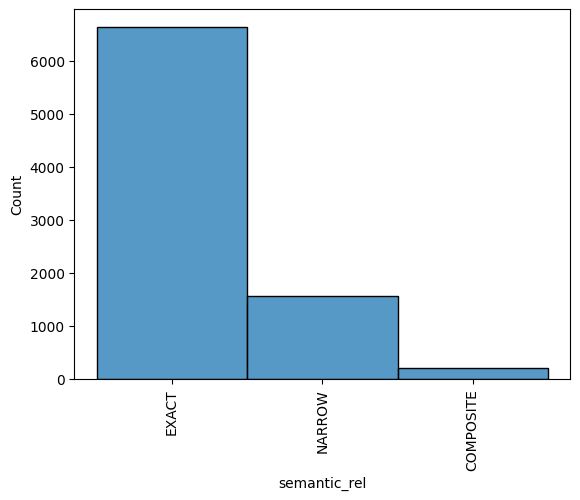

In [12]:
sns.histplot(df_medprocner.semantic_rel)
plt.xticks(rotation=90);

In [13]:
WRITE_MEDPROCNER = False
DATA_OUT = 'data/processed'
if WRITE_MEDPROCNER:
    df_medprocner.to_csv(os.path.join(DATA_OUT, 'medprocner.tsv'), sep='\t', index=False)

## SympTEMIST

In [14]:
df_symptemist_train = pd.read_csv(os.path.join(DATA_DIR, 'symptemist_tsv_train_subtask2_complete+COMPOSITE.tsv'), sep='\t', dtype={'code': str})
df_symptemist_test = pd.read_csv(os.path.join(DATA_DIR, 'symptemist_tsv_test_subtask2+COMPOSITE.tsv'), sep='\t', dtype={'code': str})
df_symptemist = pd.concat([df_symptemist_train, df_symptemist_test], ignore_index=True)
print("Original shape:", df_symptemist.shape, "\n")
print("Duplicates by [filename, span_ini, span_end]:", df_symptemist[df_symptemist.duplicated(subset=["filename", "span_ini", "span_end"], keep=False)].shape[0], "\n")
print("Null content:", df_symptemist.isnull().sum().sum(), "\n")

print(df_symptemist[~df_symptemist.code.str.match(r'(\d+\+?)+')].to_markdown(), "\n")

df_symptemist = df_symptemist[df_symptemist.code.str.match(r'(\d+\+?)+')]
print("Shape after removing non-numeric codes:", df_symptemist.shape)

# Convert all composites into sem_rel = COMPOSITE
df_symptemist.loc[df_symptemist['is_composite'], 'sem_rel'] = 'COMPOSITE'

# Standardize the column names
d_rename_sym = {'filename': 'filename', 'span_ini': 'off0', 'span_end': 'off1', 'code': 'code', 'text': 'span', 'sem_rel': 'semantic_rel'}
df_symptemist = df_symptemist.rename(columns=d_rename_sym)

df_symptemist = df_symptemist[["filename", "label", "off0", "off1", "span", "code", "semantic_rel"]]

# assert df_symptemist.columns.tolist() != df_distemist.columns.tolist(), "Columns are not in the standard format"

df_symptemist.loc[df_symptemist['semantic_rel'].str.contains('\+'), 'semantic_rel'] = 'COMPOSITE'

df_symptemist.head()

Original shape: (12014, 10) 

Duplicates by [filename, span_ini, span_end]: 2 

Null content: 0 

|       | filename                     | label   |   span_ini |   span_end | text                                                                                                                                                                              | code                                                                                  | sem_rel                                                   | is_composite   | is_abbrev   | need_context   |
|------:|:-----------------------------|:--------|-----------:|-----------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------|:----------------------------------------------------------|:---------------|:------------|:-------------

,filename,label,off0,off1,span,code,semantic_rel
0,es-S0365-66912011000600005-2,SINTOMA,333,361,«manchas» en el campo visual,246658005,EXACT
1,es-S0004-06142010000300011-1,SINTOMA,649,716,5HIAA en orina de 24 horas estaba dentro de lo...,171250001,NARROW
2,es-S1130-01082007000700011-2,SINTOMA,1463,1505,A nivel analítico no presentaba alteración,166315009,NARROW
3,es-S0210-48062009000300017-1,SINTOMA,2713,2759,a nivel del cardias masa mamelonada y ulcerada,126825008,NARROW
4,es-S1130-01082006000100014-1,SINTOMA,2282,2295,abdomen agudo,9209005,EXACT


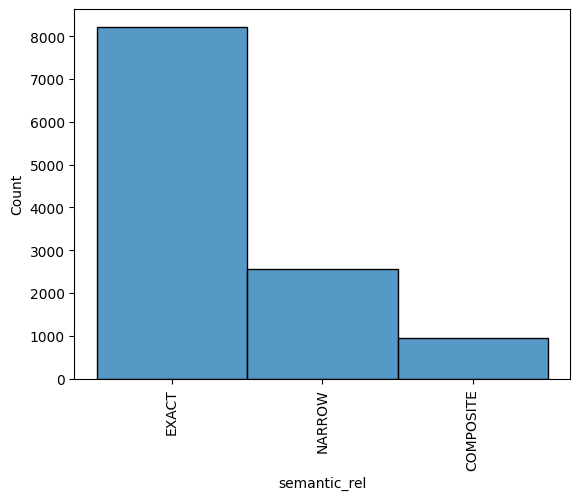

In [15]:
sns.histplot(df_symptemist.semantic_rel)
plt.xticks(rotation=90);

In [16]:
WRITE_SYMPTEMIST = False
DATA_OUT = 'data/processed'
if WRITE_SYMPTEMIST:
    df_symptemist.to_csv(os.path.join(DATA_OUT, 'symptemist.tsv'), sep='\t', index=False)

## Pharmaconer

In [17]:
def join_files(dir):
    final_string = ""
    for file in os.listdir(dir):
        if file.endswith('.ann'):
            with open(os.path.join(dir, file), 'r') as f:
                final_string += f.read()
    return final_string

def process_pn(file):
    df_pn = pd.read_csv(file, sep='\t', header=None)
    df_pn['filename'] = file.split('/')[-1].split('.')[0]
    return df_pn

df_pharmaconer = pd.DataFrame()
for file in os.listdir('data/raw/pharmaconer/'):
    if file.endswith('.ann'):
        try:
            df_i = process_pn(os.path.join('data/raw/pharmaconer/', file))
            df_pharmaconer = pd.concat([df_pharmaconer, df_i], ignore_index=True)
        except pd.errors.EmptyDataError:
            continue

# df_pharmaconer['mention_id'] = df_pharmaconer[0].str.extract(r'(\d+)$')
df_t = df_pharmaconer[df_pharmaconer[0].str.contains(r'^T\d+')].copy()
# print(df_t.head().to_markdown(), "\n")
df_t = df_t.rename(columns={0: "mention_id"})

df_h = df_pharmaconer[df_pharmaconer[0].str.contains(r'^\#\d+')].copy()
# print(df_h.head().to_markdown(), "\n")
df_h["mention_id"] = df_h[1].str.split().str[1]

df_th = df_t[["filename", "mention_id", 2, 1]].merge(df_h[["filename", "mention_id", 2]], on=["filename", "mention_id"], how='inner')
# print(df_th.head().to_markdown(), "\n")

df_th.columns = ["filename", "mention_id", "span", "prespan", "code"]
df_th['off0'] = df_th["prespan"].str.extract(r'\w+\s(\d+)\s\d+$')
df_th['off1'] = df_th["prespan"].str.extract(r'\w+\s\d+\s(\d+)$')
# print(df_th.head().to_markdown(), "\n")
df_pharmaconer = df_th.drop(columns=["prespan", "mention_id"])
df_pharmaconer['label'] = 'FARMACO'
df_pharmaconer['semantic_rel'] = 'EXACT'

print("Original shape:", df_pharmaconer.shape, "\n")
print("Strange codes:", df_pharmaconer[~df_pharmaconer.code.str.match(r'(\d+\+?)+')].code.unique(), "\n")

df_pharmaconer = df_pharmaconer[df_pharmaconer.code.str.match(r'(\d+\+?)+')]
print("Shape after removing non-numeric codes:", df_pharmaconer.shape)

df_pharmaconer = df_pharmaconer[["filename", "label", "off0", "off1", "span", "code", "semantic_rel"]]
print(df_pharmaconer.head().to_markdown(), "\n")

Original shape: (7556, 7) 

Strange codes: ['<null>' 'CHEBI:53493' 'CHEBI:29368' 'CHEBI:135810' 'CHEBI:63623'
 'CHEBI:60737' 'CHEBI:48058' 'CHEBI:25710' 'chebi:53492' 'CHEBI:3762'
 'CHEBI:53492'] 

Shape after removing non-numeric codes: (7267, 7)
|    | filename                  | label   |   off0 |   off1 | span      |      code | semantic_rel   |
|---:|:--------------------------|:--------|-------:|-------:|:----------|----------:|:---------------|
|  1 | S0211-69952009000500017-1 | FARMACO |    576 |    580 | Ig M      |  74889000 | EXACT          |
|  2 | S0211-69952009000500017-1 | FARMACO |   1551 |   1560 | enalapril | 372658000 | EXACT          |
|  3 | S0211-69952009000500017-1 | FARMACO |    198 |    207 | enalapril | 372658000 | EXACT          |
|  4 | S0211-69952009000500017-1 | FARMACO |   1518 |   1522 | urea      | 387092000 | EXACT          |
|  5 | S0211-69952009000500017-1 | FARMACO |    115 |    119 | urea      | 387092000 | EXACT          | 



In [18]:
WRITE_PHARMACONER = False
DATA_OUT = 'data/processed'
if WRITE_PHARMACONER:
    df_pharmaconer.to_csv(os.path.join(DATA_OUT, 'pharmaconer.tsv'), sep='\t', index=False)

## CompleteData

There are certain concepts which are simultaneously ENFERMEDAD and SYMPTOM or PROCEDURE. We will remove this kind of duplicates preserving the codes.

In [19]:
df_data = pd.concat([df_distemist, df_medprocner, df_symptemist, df_pharmaconer], ignore_index=True)
print(df_data[df_data.duplicated(subset=["filename", "off0", "off1"], keep=False)].sort_values(by=["filename", "off0", "off1"]).head(10).to_markdown(), "\n")

print("Original shape:", df_data.shape, "\n")
print("Null content:", df_data.isnull().sum().sum(), "\n")
print("Strange codes:", df_data[~df_data.code.str.match(r'(\d+\+?)+')].code.unique(), "\n")

|       | filename                  | label      |   off0 |   off1 | span                  |      code | semantic_rel   |
|------:|:--------------------------|:-----------|-------:|-------:|:----------------------|----------:|:---------------|
|  4774 | S0004-06142005000900016-1 | ENFERMEDAD |     54 |     67 | estreñimiento         |  14760008 | EXACT          |
| 24794 | S0004-06142005000900016-1 | SINTOMA    |     54 |     67 | estreñimiento         |  14760008 | EXACT          |
|  4777 | S0004-06142005000900016-1 | ENFERMEDAD |    185 |    194 | hematuria             |  34436003 | EXACT          |
| 24795 | S0004-06142005000900016-1 | SINTOMA    |    185 |    194 | hematuria             |  53298000 | EXACT          |
|  4676 | S0004-06142005001000011-1 | ENFERMEDAD |   1521 |   1534 | déficit motor         | 398991009 | EXACT          |
| 24778 | S0004-06142005001000011-1 | SINTOMA    |   1521 |   1534 | déficit motor         |  52559000 | EXACT          |
|  4673 | S0004-06142005

In [20]:
WRITE_TOTAL = False
DATA_OUT = 'data/processed'
if WRITE_TOTAL:
    df_data.to_csv(os.path.join(DATA_OUT, 'total.tsv'), sep='\t', index=False)

## Original Variables

# Clinical Variables

In [14]:
df_variables_orig = pd.read_csv(os.path.join(VAR_DATA, 'DT4H Multilingual Dictionary Entity Linking - all variables.csv'), 
                                dtype={'code': str},
                                usecols=['DT4HID', 'CONCEPT', 'SNOMEDID NUMBER', 'SNOMED PT (International Edition April 2024)', 
                                         'SNOMEDID CLASS', 'NLP4BIA NER Class'])

df_variables_orig = df_variables_orig.rename(columns={'DT4HID': 'ID', 'CONCEPT':'name', 'SNOMEDID NUMBER': 'code', 
                                                      'SNOMED PT (International Edition April 2024)': 'term', 
                                                      'SNOMEDID CLASS': 'semantic_tag', 'NLP4BIA NER Class':'label'})

df_variables_orig = df_variables_orig[df_variables_orig['code'].str.match(r'^\d+$')]
d_classes = {"Procedimiento": "PROCEDIMIENTO", "Fármaco": "FARMACO", "Síntoma":"SINTOMA", "Enfermedad": "ENFERMEDAD"}
df_variables_orig["label"] = df_variables_orig["label"].map(d_classes).fillna("OTROS")
df_variables_orig

,ID,name,code,semantic_tag,label,term
2,DT4HDem-3,Sex female,248152002,finding,OTROS,Female
3,DT4HDem-4,Sex male,248153007,finding,OTROS,Male
5,DT4HDem-6,YOB,184099003,observable entity,OTROS,Date of birth
6,DT4HDem-7,Height,1153637007,observable entity,OTROS,Body height
7,DT4HDem-8,Weight,27113001,observable entity,OTROS,Body weight
...,...,...,...,...,...,...
192,DT4H-Proc2,Cardiovascular implant,303490004,other,PROCEDIMIENTO,Cardiovascular implant
193,DT4H-Proc3,Vascular implant,303617005,other,PROCEDIMIENTO,Vascular implant
194,DT4H-Proc4,Transplant heart,420291005,other,PROCEDIMIENTO,Transplant heart
202,DT4H-Out8,Hospital admission,32485007,procedure,OTROS,NaN


In [17]:
df_variables_med = pd.read_csv(os.path.join(VAR_DATA, 'DT4H Multilingual Dictionary Entity Linking - Medication.csv'),
                                 dtype={'code': str},
                                 usecols=['DT4HID', 'SNOMEDID NUMBER', 'CONCEPT', 'SNOMEDID CLASS'])

df_variables_med = df_variables_med.rename(columns={'DT4HID': 'ID', 'SNOMEDID NUMBER': 'code',
                                                    'CONCEPT': 'name', 'SNOMEDID CLASS': 'semantic_tag'})
df_variables_med['label'] = "FARMACO"
df_variables_med["term"] = df_variables_med["name"]

df_vars_med_ovlap = df_variables_med[df_variables_med["ID"].isin(df_variables_orig["ID"])]
# Remove those that are already in the "all variables"
df_variables_med = df_variables_med[~df_variables_med["ID"].isin(df_variables_orig["ID"])]

df_variables_orig_med = pd.concat([df_variables_orig, df_variables_med], ignore_index=True)

df_variables_orig_med = df_variables_orig_med.drop_duplicates(subset=["ID"])
df_variables_orig_med.loc[df_variables_orig_med["ID"].isin(df_vars_med_ovlap["ID"]), ["semantic_tag", "term"]] = df_vars_med_ovlap[["semantic_tag", "term"]].values

df_variables_orig_med.dropna(inplace=True)

print("Original shape:", df_variables_orig_med.shape, "\n")
df_variables_med

Original shape: (652, 6) 



,ID,name,code,semantic_tag,label,term
1,DT4H-MedR11,Substance with angiotensin II receptor antagon...,372913009,substance,FARMACO,Substance with angiotensin II receptor antagon...
2,DT4H-MedR111,Fimasartan potassium trihydrate,1332434009,substance,FARMACO,Fimasartan potassium trihydrate
3,DT4H-MedR112,Fimasartan,1332433003,substance,FARMACO,Fimasartan
4,DT4H-MedR113,Azilsartan medoxomil potassium,895431005,substance,FARMACO,Azilsartan medoxomil potassium
5,DT4H-MedR114,Irbesartan hydrochloride,734504000,substance,FARMACO,Irbesartan hydrochloride
...,...,...,...,...,...,...
554,DT4H-MedSG117,Canagliflozin hemihydrate,725664009,substance,FARMACO,Canagliflozin hemihydrate
555,DT4H-MedSG118,Empagliflozin,703894008,substance,FARMACO,Empagliflozin
556,DT4H-MedSG119,Canagliflozin,703676004,substance,FARMACO,Canagliflozin
557,DT4H-MedSG120,Dapagliflozin propanediol,703675000,substance,FARMACO,Dapagliflozin propanediol


In [18]:
df_variables_orig_med.loc[df_variables_orig_med["ID"].isin(df_vars_med_ovlap["ID"]), :]

,ID,name,code,semantic_tag,label,term
114,DT4H-MedR1,RAS-inhibitors,866173006,substance,PROCEDIMIENTO,RAS-INHIBITORS
115,DT4H-MedA1,ACE-inhibitors,372733002,substance,PROCEDIMIENTO,ACE-INHIBITORS
116,DT4H-MedAR1,Angiotensin receptor blocker,372913009,substance,PROCEDIMIENTO,ANGIOTENSIN RECEPTOR BLOCKER
117,DT4H-Med2,Angiotensin receptor/neprilysin inhibitor (ARNI),777480008,medicinal product,PROCEDIMIENTO,ANGIOTENSIN RECEPTOR/NEPRILYSIN INHIBITOR (ARNI)
118,DT4H-MedM1,Mineralcorticoid Receptor Antagonist (MRA),372603003,substance,PROCEDIMIENTO,MINERALCORTICOID RECEPTOR ANTAGONIST (MRA)
119,DT4H-MedD1,Diuretics,372695000,substance,PROCEDIMIENTO,DIURETICS
120,DT4H-MedL1,Loop diuretics,372691009,substance,PROCEDIMIENTO,LOOP DIURETIC
121,DT4H-MedC1,Calcium Channel Blockers,373304005,substance,PROCEDIMIENTO,CALCIUM CHANNEL BLOCKER
123,DT4H-MedP1,Platelet inhibitor,771452004,substance,PROCEDIMIENTO,SUBSTANCE WITH PLATELET AGGREGATION INHIBITOR ...
124,DT4H-MedCO1,Anticoagulants,372862008,substance,PROCEDIMIENTO,ANTICOAGULANTS


In [19]:
df_variables_orig_med.label.value_counts()

label
FARMACO          522
OTROS             49
ENFERMEDAD        36
SINTOMA           24
PROCEDIMIENTO     21
Name: count, dtype: int64

In [20]:
WRITE_VARIABLES = True
DATA_VAR_OUT = 'data/variables/processed'
if WRITE_VARIABLES:
    df_variables_orig_med.to_csv(os.path.join(DATA_VAR_OUT, 'variables.tsv'), sep='\t', index=False)

### Translations

Original shape: (363, 5)
Duplicates by code: 37 

Shape after removing duplicates: (326, 5) 

|     |       code | en                               | es                               |   nl | sv                                   |
|----:|-----------:|:---------------------------------|:---------------------------------|-----:|:-------------------------------------|
| 219 |  108582002 | Losartan potassium               | losartán potásico                |  nan | losartankalium                       |
| 151 |  108582002 | Losartan potassium               | losartán potásico                |  nan | losartankalium                       |
| 199 | 1119307002 | Enalapril sodium                 | enalapril sódico                 |  nan | enalaprilnatrium                     |
| 157 | 1119307002 | Enalapril sodium                 | enalapril sódico                 |  nan | enalaprilnatrium                     |
| 198 | 1119308007 | Perindopril erbumine monohydrate | perindopril erbumina monohid

,code,en,es,nl,sv
0,248152002,Female,mujer,vrouwelijk,kvinnligt kön
1,248153007,Male,varón,mannelijk,manligt kön
2,184099003,Date of birth,fecha de nacimiento,geboortedatum,födelsedatum
3,1153637007,Body height,altura corporal,NaN,kroppslängd
4,27113001,Body weight,peso corporal,lichaamsgewicht,kroppsvikt


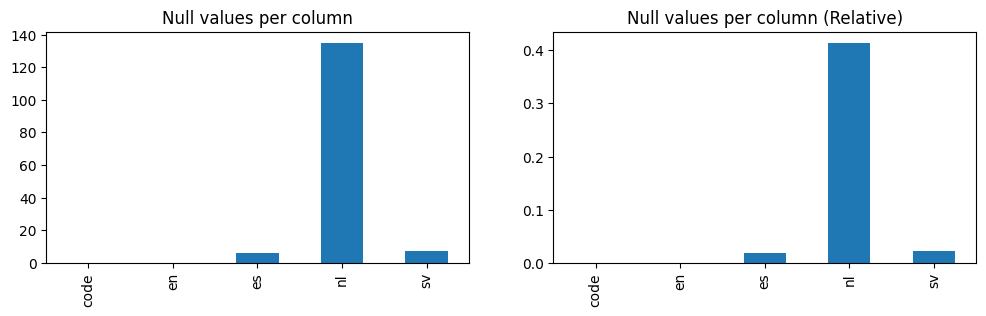

In [21]:
# Read the variables from 
df_variables = pd.read_csv(os.path.join(VAR_DATA, 'SNOMED Translate - Variables.csv'), sep=',', dtype={'SNOMED_ID': str})
df_variables.rename(columns={'SNOMED_ID': 'code'}, inplace=True)

# Remove duplicates
print("Original shape:", df_variables.shape)
print("Duplicates by code:", df_variables.duplicated(subset=["code"], keep="first").sum(), "\n")
print("Shape after removing duplicates:", df_variables.drop_duplicates(subset=["code"], keep="first").shape, "\n")
print(df_variables[df_variables.duplicated(subset=["code"], keep=False)].sort_values(by="code").head().to_markdown(), "\n")
df_variables = df_variables.drop_duplicates(subset=["code"], keep="first")

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

df_variables.isnull().sum().plot(kind='bar', ax=ax[0])
ax[0].set_title("Null values per column")

df_variables.isnull().mean().plot(kind='bar', ax=ax[1])
ax[1].set_title("Null values per column (Relative)")

df_variables.head()

In [22]:
df_aux_vars = pd.read_csv(os.path.join(VAR_DATA, 'DT4H Multilingual Dictionary Entity Linking - all variables.csv'), header=0, usecols=[2, 3, 4, 7])
df_aux_vars.columns = ["term", "code", "semantic_tag", "snomed_term"]
df_aux_vars = df_aux_vars[df_aux_vars.code.str.match(r'(\d+\+?)+')].reset_index(drop=True)
# df_aux_vars["term"] = df_aux_vars["term"].str.replace(r'\n', '', regex=True).str.strip()
df_aux_vars

,term,code,semantic_tag,snomed_term
0,Sex female,248152002,finding,Female
1,Sex male,248153007,finding,Male
2,YOB,184099003,observable entity,Date of birth
3,Height,1153637007,observable entity,Body height
4,Weight,27113001,observable entity,Body weight
...,...,...,...,...
134,Cardiovascular implant,303490004,other,Cardiovascular implant
135,Vascular implant,303617005,other,Vascular implant
136,Transplant heart,420291005,other,Transplant heart
137,Hospital admission,32485007,procedure,NaN


In [23]:
df_aux_vars[df_aux_vars.duplicated(subset=["code"], keep=False)].sort_values(by='code').head()

,term,code,semantic_tag,snomed_term
67,TropThs,102682001,substance,Troponin T
68,TropTnhs,102682001,substance,Troponin T
65,TropIhs,102683006,substance,Troponin I
66,TropInhs,102683006,substance,Troponin I
50,BSA,301898006,observable entity,Body surface area


In [24]:
df_variables[df_variables.duplicated(subset=["code"], keep=False)].sort_values(by='code')


,code,en,es,nl,sv


In [25]:
df_vars_final = df_aux_vars.merge(df_variables, on='code', how='left')
df_vars_final

,term,code,semantic_tag,snomed_term,en,es,nl,sv
0,Sex female,248152002,finding,Female,Female,mujer,vrouwelijk,kvinnligt kön
1,Sex male,248153007,finding,Male,Male,varón,mannelijk,manligt kön
2,YOB,184099003,observable entity,Date of birth,Date of birth,fecha de nacimiento,geboortedatum,födelsedatum
3,Height,1153637007,observable entity,Body height,Body height,altura corporal,NaN,kroppslängd
4,Weight,27113001,observable entity,Body weight,Body weight,peso corporal,lichaamsgewicht,kroppsvikt
...,...,...,...,...,...,...,...,...
134,Cardiovascular implant,303490004,other,Cardiovascular implant,Cardiovascular implant,implante cardiovascular,cardiovasculair implantaat,kardiovaskulärt implantat
135,Vascular implant,303617005,other,Vascular implant,Vascular implant,implante vascular,vasculair implantaat,kärlimplantat
136,Transplant heart,420291005,other,Transplant heart,Transplant heart,trasplante de corazón,materiaal voor harttransplantaat,transplantatmaterial från hjärta
137,Hospital admission,32485007,procedure,NaN,Hospital admission,admisión hospitalaria,opname in ziekenhuis,inskrivning på sjukhus


In [26]:
vars = set(df_variables.en.tolist())
total_vars = set(df_aux_vars.term.tolist())
vars.intersection(total_vars)

{'Angina pectoris',
 'Arterial oxygen saturation',
 'Atrial fibrillation',
 'Cardiovascular implant',
 'Chest pain',
 'Death',
 'Dementia',
 'Ferritin',
 'Heart failure',
 'Hospital admission',
 'Hyperthyroidism',
 'Ivabradine',
 'Myocardial infarction',
 'Never smoked tobacco',
 'Potassium',
 'Smoker',
 'Sodium'}

Text(0.5, 1.0, 'Null values per column (Relative)')

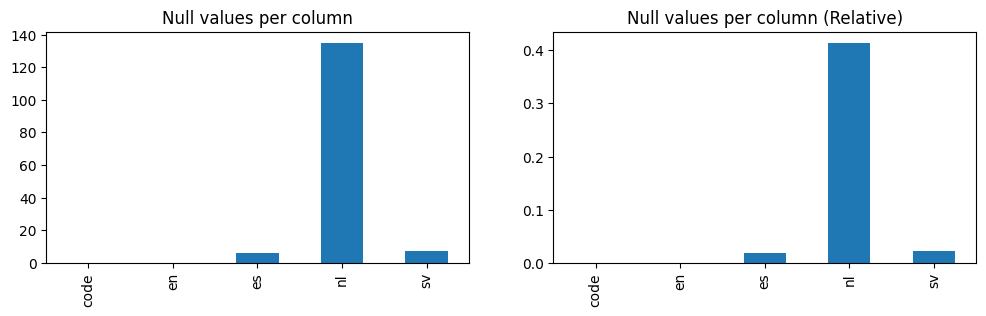

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

df_variables.isnull().sum().plot(kind='bar', ax=ax[0])
ax[0].set_title("Null values per column")

df_variables.isnull().mean().plot(kind='bar', ax=ax[1])
ax[1].set_title("Null values per column (Relative)")


In [28]:
WRITE_VARIABLES = False
DATA_VAR_OUT = 'data/variables/processed'
if WRITE_VARIABLES:
    df_variables.to_csv(os.path.join(DATA_VAR_OUT, 'variables_trans.tsv'), sep='\t', index=False)